Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=VTzOXazPkdM&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=8

# EDA (Rossmann Store Sales)

Used resource:\
https://www.kaggle.com/c/rossmann-store-sales

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,Lasso, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('data/rossm_train.csv')

In [3]:
df.shape

(1017209, 9)

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
stores=pd.read_csv('data/rossm_store.csv')

In [6]:
stores.shape

(1115, 10)

In [7]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df=df.merge(stores, on='Store', how='left')

In [10]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df.shape

(1017209, 18)

In [12]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [13]:
df=df[['Store',  'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday','StoreType', 'Assortment',
       'CompetitionDistance']]

In [14]:
df.Date=pd.to_datetime(df.Date)

In [15]:
df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [16]:
df.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [17]:
df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [18]:
df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [19]:
df.Store.nunique()

1115

In [20]:
n_store=df.Store.value_counts()
n_store

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64

In [21]:
stores_list=n_store[n_store==942].index.tolist()
len(stores_list)

934

In [22]:
store_sales=df[df.Store.isin(stores_list)].groupby(['Store']).Sales.sum().sort_values(ascending=False)

In [23]:
store_sales.head()

Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
Name: Sales, dtype: int64

<AxesSubplot:ylabel='Store'>

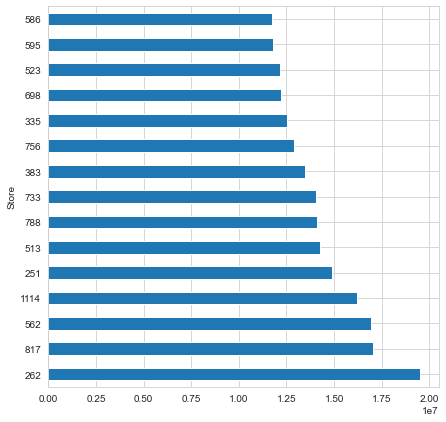

In [24]:
store_sales.head(15).plot(kind='barh',figsize=(7,7))

In [25]:
rand_stores=random.sample(store_sales.index.tolist(), 100)

In [26]:
df=df[df.Store.isin(rand_stores)]

In [28]:
df.shape

(94200, 11)

In [29]:
df['weekday']=df.Date.dt.weekday
df['monthday']=df.Date.dt.day
df['month']=df.Date.dt.month
df['year']=df.Date.dt.year

In [34]:
df['logSales'] = np.log(df['Sales']+1)

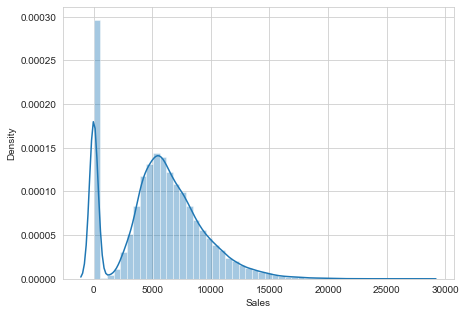

In [35]:
def distplot(x):
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.distplot(x,ax=ax)  
    plt.show()
distplot(df['Sales'])

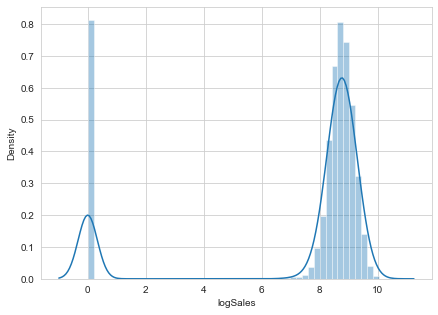

In [36]:
distplot(df['logSales'])

In [37]:
sales_month_aggr=df.set_index('Date').groupby([pd.Grouper(freq='M'),'Store'])\
.Sales.sum().to_frame('sales_month_aggr').reset_index()
month_sales_mean=sales_month_aggr.groupby(['Store']).sales_month_aggr.mean()\
.to_frame('monthSales').reset_index()

In [38]:
month_sales_mean.head()

,Store,monthSales
0,1,119898.516129
1,23,138719.322581
2,27,238187.387097
3,38,150890.870968
4,42,255766.709677


In [39]:
df=df.merge(month_sales_mean,on='Store',how='left')
df['logMonthSales']=np.log1p(df['monthSales'])

In [40]:
df.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,weekday,monthday,month,year,logSales,monthSales,logMonthSales
0,1,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,4,31,7,2015,8.568646,119898.516129,11.694409
1,23,2015-07-31,7273,560,1,1,0,1,d,a,4060.0,4,31,7,2015,8.892062,138719.322581,11.840215
2,27,2015-07-31,13213,1263,1,1,0,1,a,a,60.0,4,31,7,2015,9.489032,238187.387097,12.380817
3,38,2015-07-31,7434,608,1,1,0,1,d,a,1090.0,4,31,7,2015,8.913954,150890.870968,11.924319
4,42,2015-07-31,11946,1235,1,1,0,1,a,c,290.0,4,31,7,2015,9.388235,255766.709677,12.452025


In [41]:
df.shape

(94200, 18)

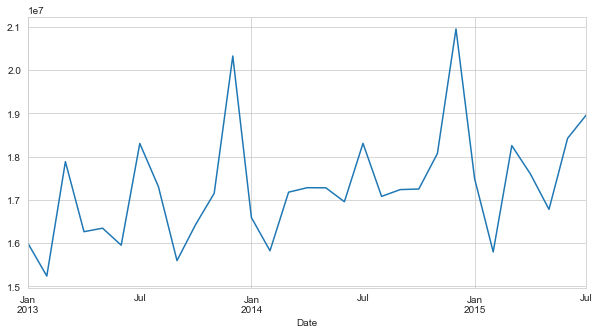

In [42]:
sales_sum_ts=df.set_index('Date').groupby([pd.Grouper(freq='M')]).Sales.sum()
_=sales_sum_ts.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

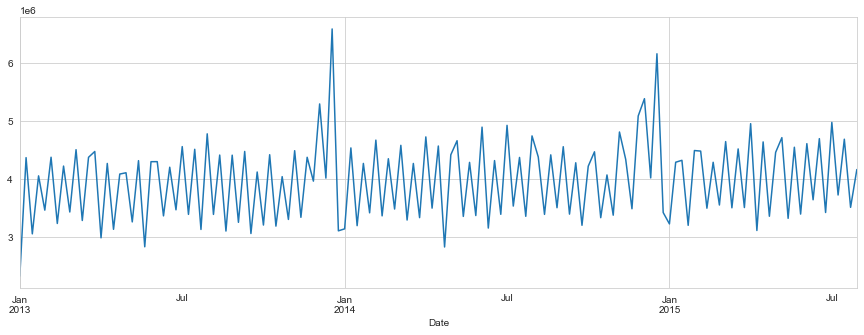

In [43]:
sales_sum_ts=df.set_index('Date').groupby([pd.Grouper(freq='W')]).Sales.sum()
sales_sum_ts.plot(figsize=(15,5))

In [45]:
store_list=df.Store.unique().tolist()
store_list[:15]

[1, 23, 27, 38, 42, 61, 111, 117, 118, 120, 135, 140, 143, 147, 153]

In [46]:
sales_sum_ts=df.set_index('Date').groupby([pd.Grouper(freq='D'),'Store']).Sales.sum().reset_index()
sales_sum_ts=sales_sum_ts[sales_sum_ts.Store.isin(store_list[:5])]
sales_sum_ts.head()

,Date,Store,Sales
0,2013-01-01,1,0
1,2013-01-01,23,0
2,2013-01-01,27,0
3,2013-01-01,38,0
4,2013-01-01,42,0


In [48]:
sales_sum_ts_p=sales_sum_ts.pivot('Date','Store','Sales')
sales_sum_ts_p.head()

Store,1,23,27,38,42
Date,,,,,
2013-01-01,0,0,0,0,0
2013-01-02,5530,4523,8674,4506,7959
2013-01-03,4327,4701,7893,3995,6925
2013-01-04,4486,4816,8361,4196,8273
2013-01-05,4997,4174,7969,5233,7587


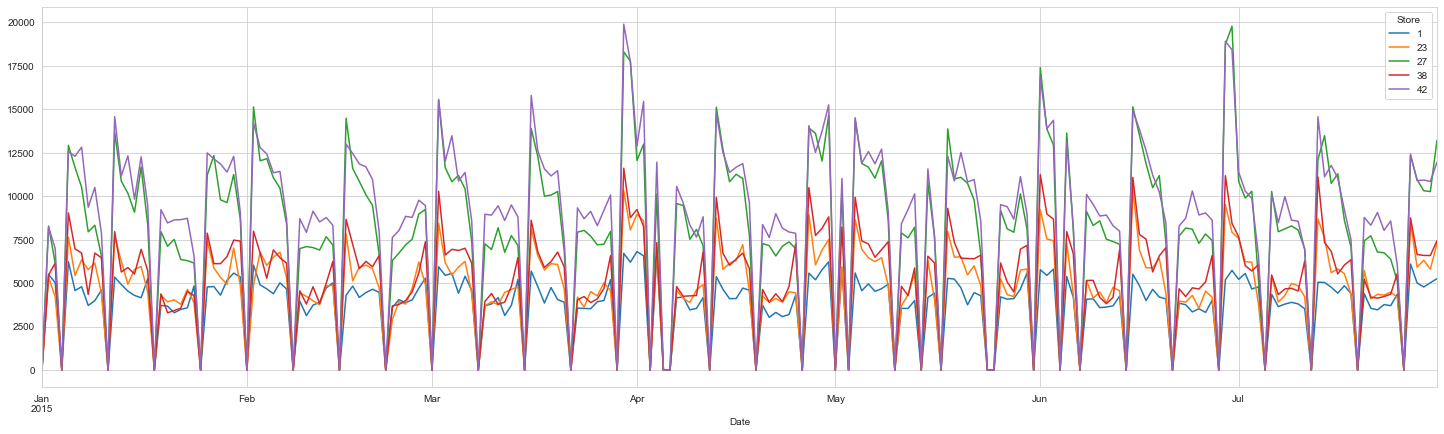

In [49]:
_=sales_sum_ts_p['2015':].plot(figsize=(25,7))

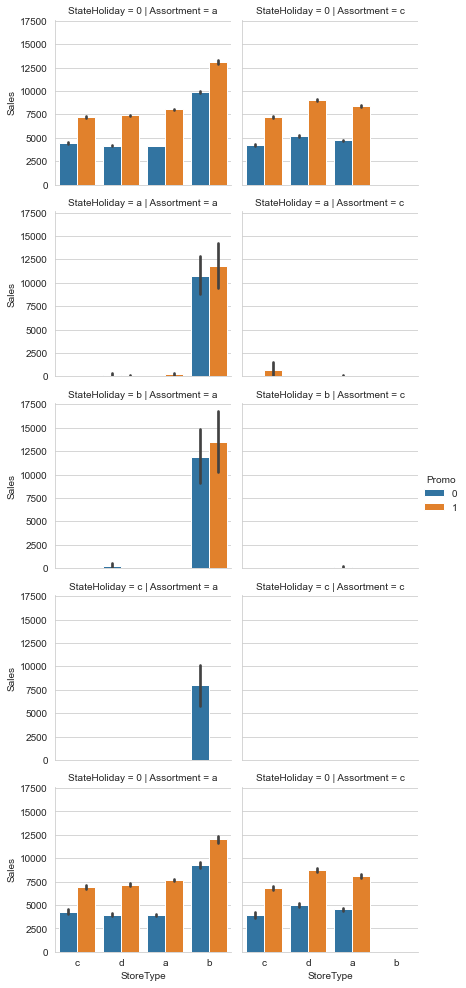

In [50]:
fig=sns.factorplot(x='StoreType', y="Sales",hue='Promo',col='Assortment',row='StateHoliday',
                   data=df,size=3, aspect=1,kind='bar')
fig.fig.subplots_adjust(top=0.9)

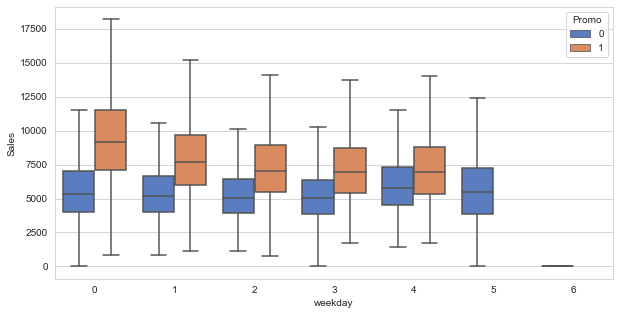

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
_ = sns.boxplot(data=df, x='weekday', y='Sales', hue='Promo',
                     palette="muted",  ax=ax, showfliers = False)

In [52]:
df.columns

Index(['Store', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'weekday', 'monthday', 'month', 'year', 'logSales', 'monthSales',
       'logMonthSales'],
      dtype='object')

In [53]:
numerical_features = ['Open', 'Promo','SchoolHoliday','logMonthSales','CompetitionDistance']
categorical_features = ['Store','StateHoliday','StoreType', 'Assortment','weekday', 'monthday', 'month']
target = 'logSales'

In [54]:
df.isnull().sum(axis=0)

Store                  0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
weekday                0
monthday               0
month                  0
year                   0
logSales               0
monthSales             0
logMonthSales          0
dtype: int64

In [55]:
df.loc[[1,2,3,4,5],'CompetitionDistance']=np.nan
df.loc[[6,7,8,9,10],'StoreType']=np.nan

In [56]:
df.isnull().sum(axis=0)

Store                  0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              5
Assortment             0
CompetitionDistance    5
weekday                0
monthday               0
month                  0
year                   0
logSales               0
monthSales             0
logMonthSales          0
dtype: int64

In [57]:
df.Date.min(), df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [58]:
test_date_begin='2015-01-01'

In [59]:
train_df=df[df.Date<test_date_begin].copy()
test_df=df[df.Date>=test_date_begin].copy()

In [60]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [61]:
test_df.isnull().sum(axis=0)

Store                  0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              5
Assortment             0
CompetitionDistance    5
weekday                0
monthday               0
month                  0
year                   0
logSales               0
monthSales             0
logMonthSales          0
dtype: int64

In [62]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df[numerical_features] = imp.fit_transform(train_df[numerical_features])
test_df[numerical_features] = imp.transform(test_df[numerical_features])

In [63]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
train_df[categorical_features]=imp.fit_transform(train_df[categorical_features])
test_df[categorical_features]=imp.transform(test_df[categorical_features])

In [64]:
train_df[categorical_features]=train_df[categorical_features].astype(str)
test_df[categorical_features]=test_df[categorical_features].astype(str)

In [65]:
test_df.isnull().sum(axis=0)

Store                  0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
weekday                0
monthday               0
month                  0
year                   0
logSales               0
monthSales             0
logMonthSales          0
dtype: int64

In [66]:
train_df.to_csv('data/rossm_train_df.csv',index=False)
test_df.to_csv('data/rossm_test_df.csv',index=False)